<a href="https://colab.research.google.com/github/abhinay-2006/AIML/blob/main/AIML_Assignment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [4]:
fetch_openml(data_id=5).keys
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name='car', version=2,parser='auto')
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.keys()
car_data.feature_names, car_data.target.value_counts()
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [7]:
car_data.feature_names
['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [8]:
type(car_data)

pandas.core.frame.DataFrame

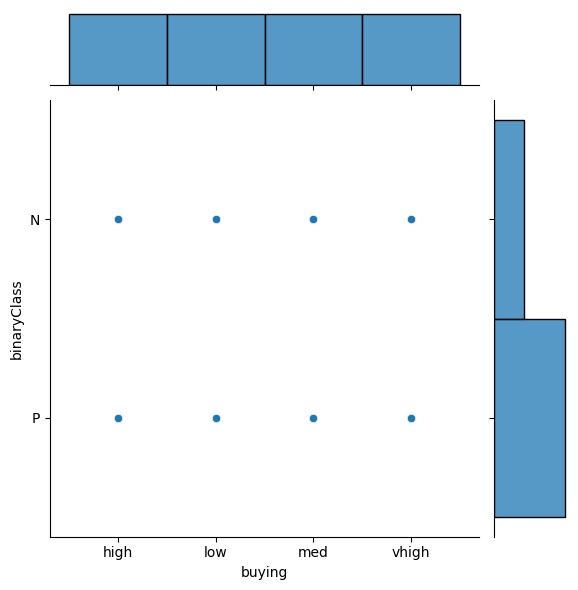

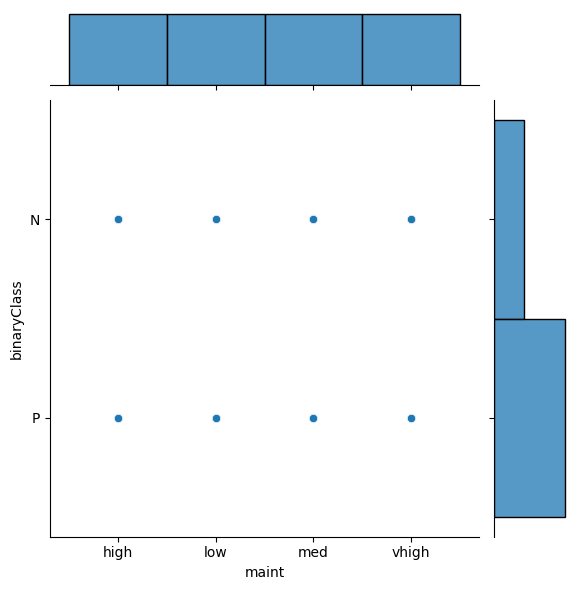

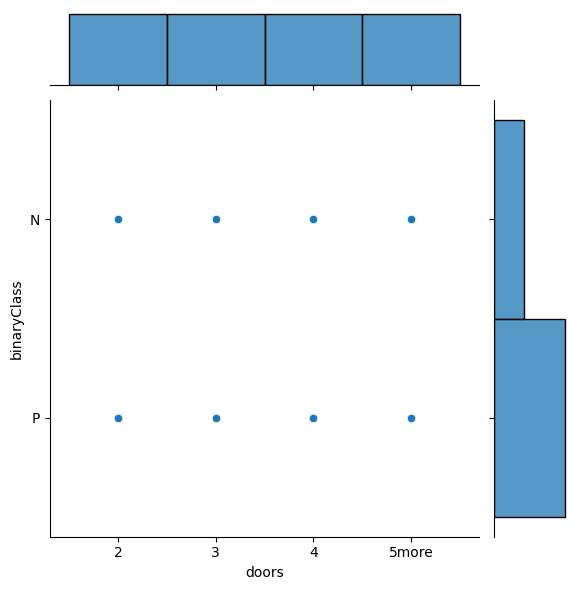

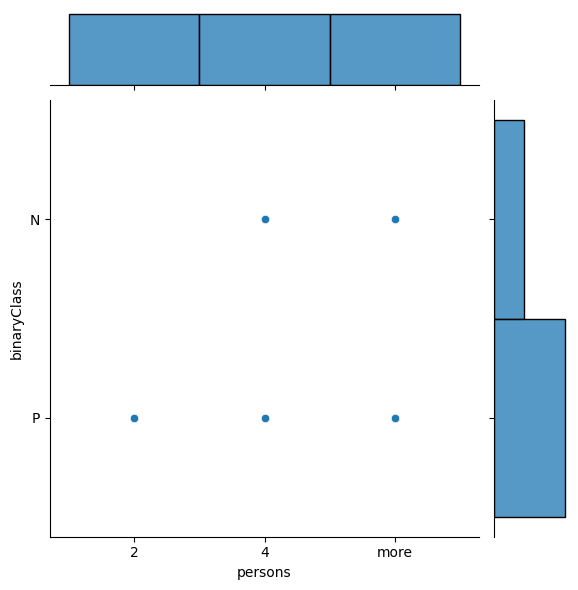

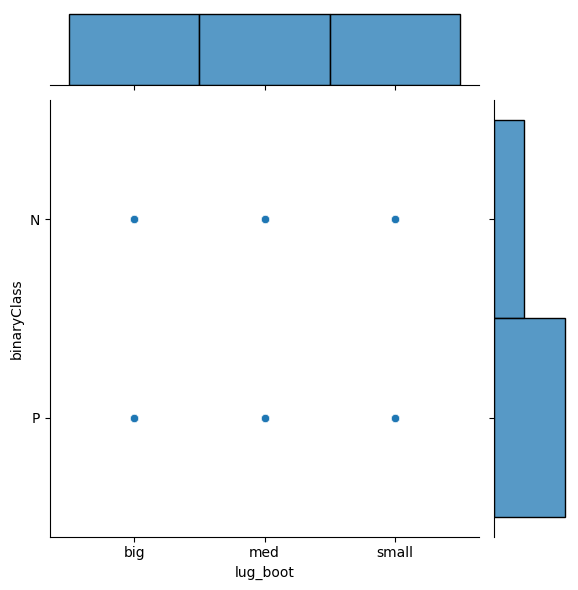

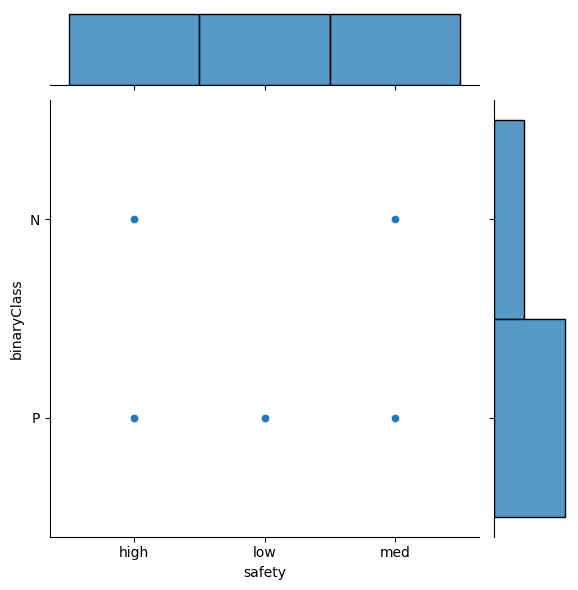

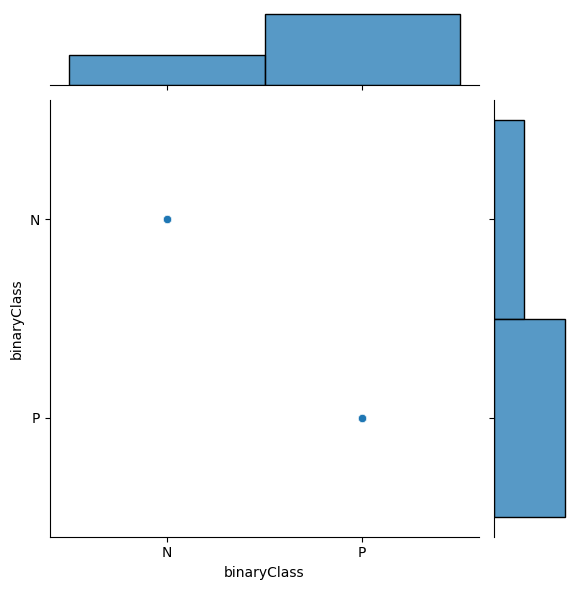

In [9]:
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',data=car_data,palette='rainbow')

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size=0.2,random_state=220)
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [11]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [12]:
train_data['maint'].value_counts()
train_data['doors'].value_counts()
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='buying', ylabel='count'>

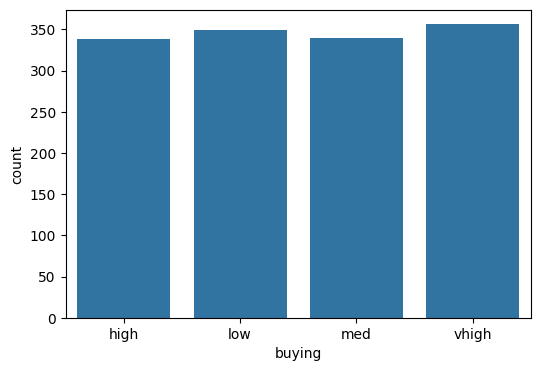

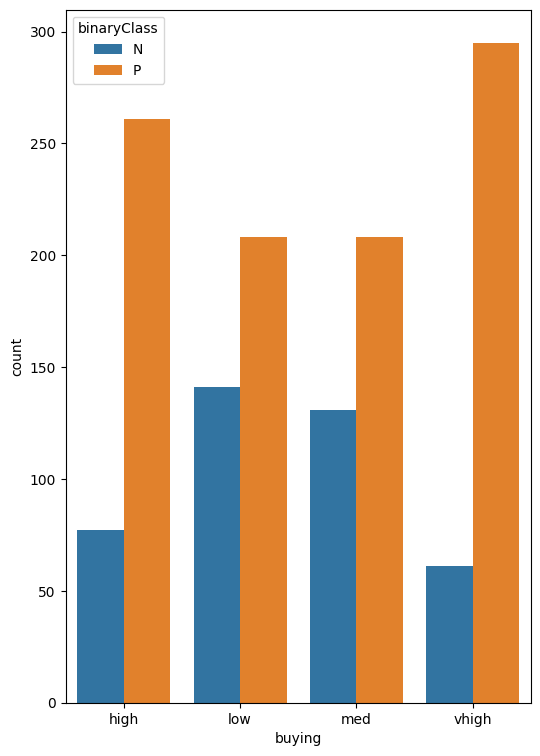

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x='buying')
plt.figure(figsize=(6,9))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

<Axes: xlabel='maint', ylabel='count'>

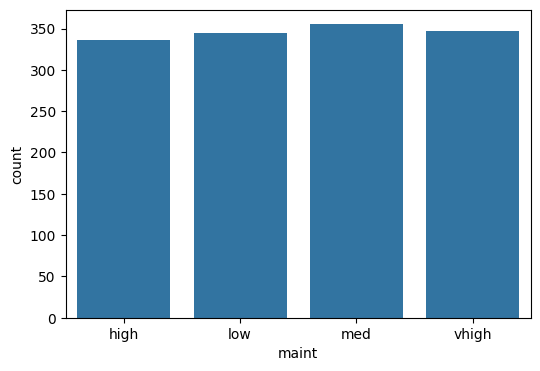

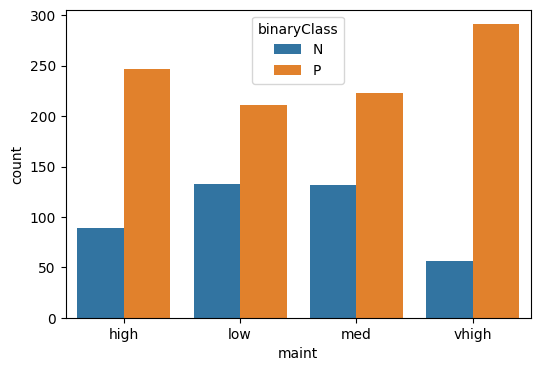

In [20]:
train_data['maint'].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x='maint')
plt.figure(figsize=(6,4))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

<Axes: xlabel='safety', ylabel='count'>

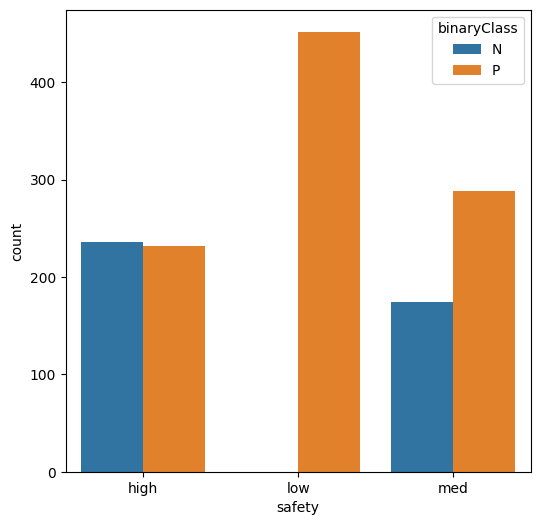

In [23]:
train_data['safety'].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

<Axes: xlabel='binaryClass', ylabel='count'>

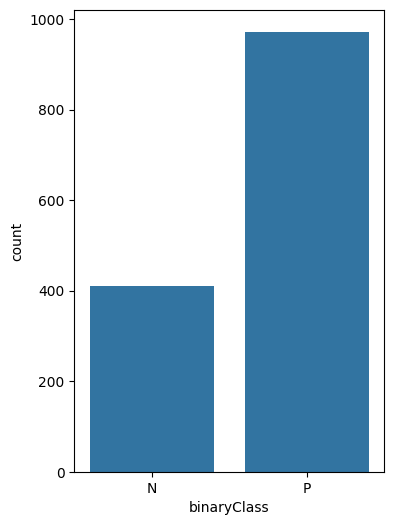

In [25]:
train_data['binaryClass'].value_counts()
plt.figure(figsize=(4,6))
sns.countplot(data=train_data, x='binaryClass')

In [28]:
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)

In [31]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)
car_train_prepared.shape, car_labels_prepared.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


((1382, 6), (1382,))

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size=0.2,random_state=220)
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [ ]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [34]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

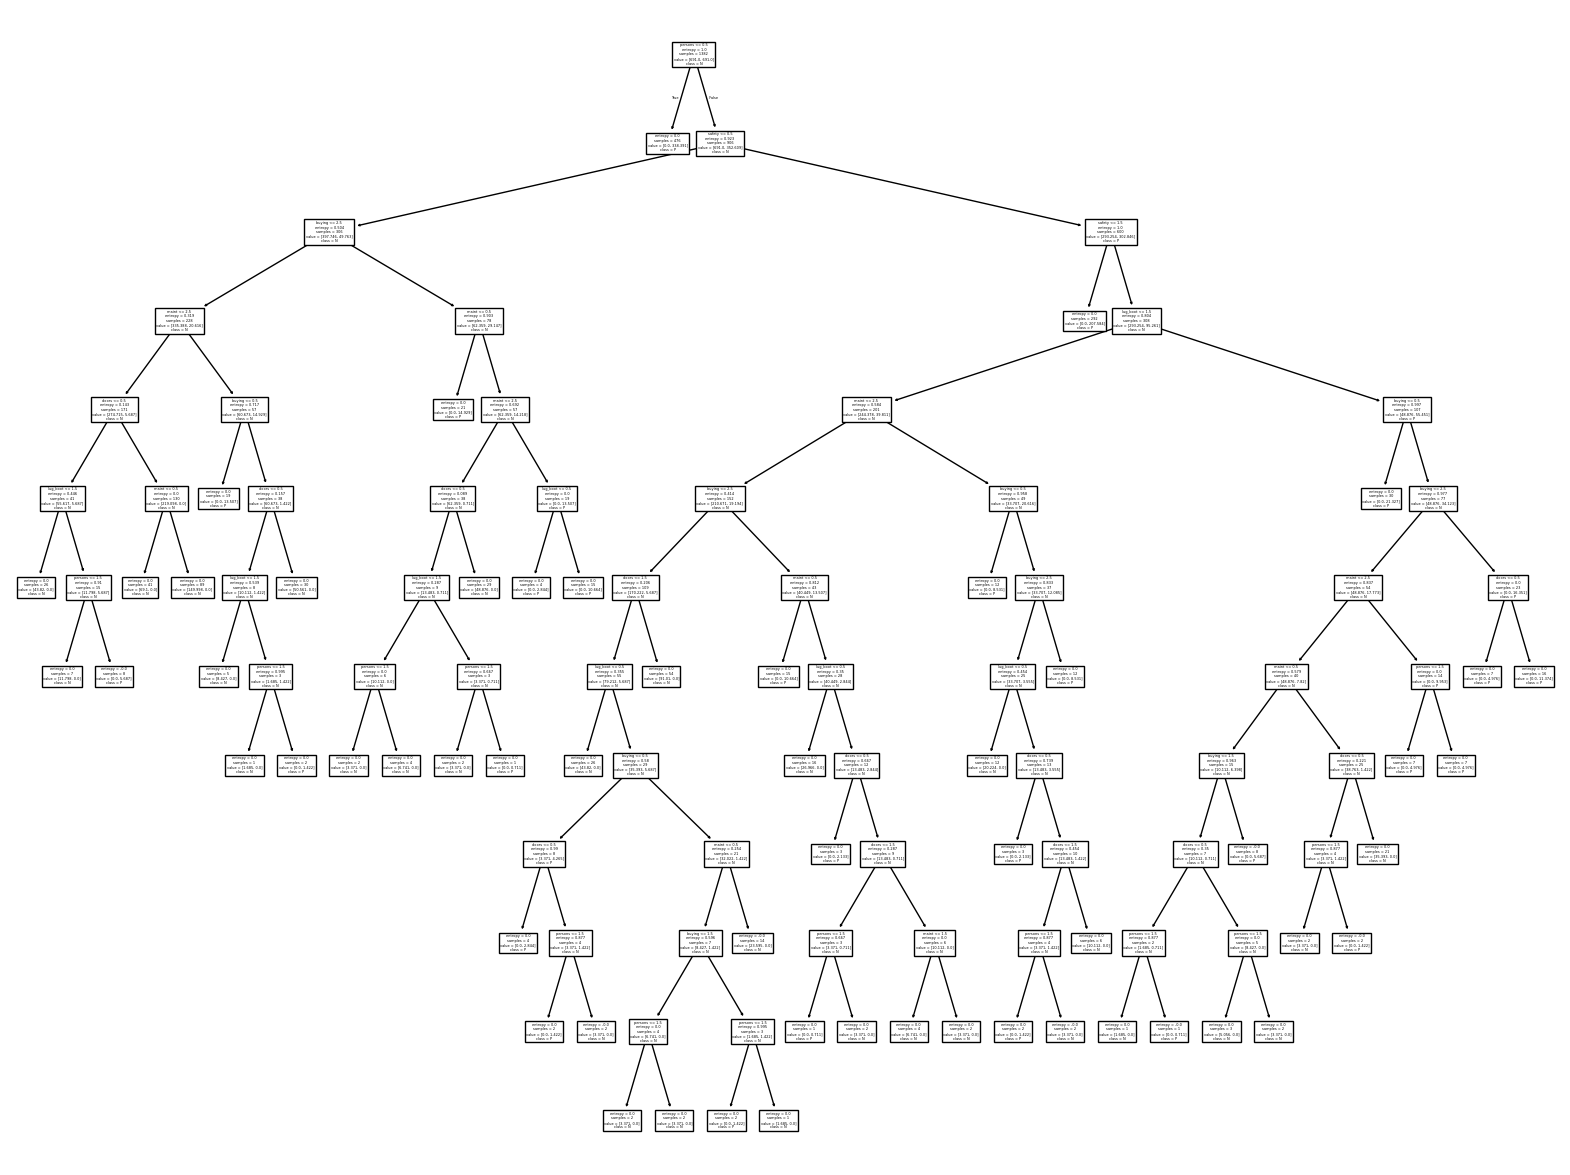

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,class_names=['N','P']);

In [51]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382



In [52]:
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Confusion Matrix:[[410   0]
 [  0 972]]


In [56]:
accuracy_score(car_labels_prepared,preds)
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

[Text(0.2857142857142857, 0.9, 'persons <= 0.5\ngini = 0.5\nsamples = 1382\nvalue = [691.0, 691.0]\nclass = N'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 476\nvalue = [0.0, 338.391]\nclass = P'),
 Text(0.21428571428571427, 0.8, 'True  '),
 Text(0.42857142857142855, 0.7, 'safety <= 0.5\ngini = 0.447\nsamples = 906\nvalue = [691.0, 352.609]\nclass = N'),
 Text(0.3571428571428571, 0.8, '  False'),
 Text(0.2857142857142857, 0.5, 'gini = 0.198\nsamples = 306\nvalue = [397.746, 49.763]\nclass = N'),
 Text(0.5714285714285714, 0.5, 'safety <= 1.5\ngini = 0.5\nsamples = 600\nvalue = [293.254, 302.846]\nclass = P'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 292\nvalue = [0.0, 207.584]\nclass = P'),
 Text(0.7142857142857143, 0.3, 'lug_boot <= 1.5\ngini = 0.37\nsamples = 308\nvalue = [293.254, 95.261]\nclass = N'),
 Text(0.5714285714285714, 0.1, 'gini = 0.241\nsamples = 201\nvalue = [244.378, 39.811]\nclass = N'),
 Text(0.8571428571428571, 0.1, 'gini = 0.498\nsamples = 1

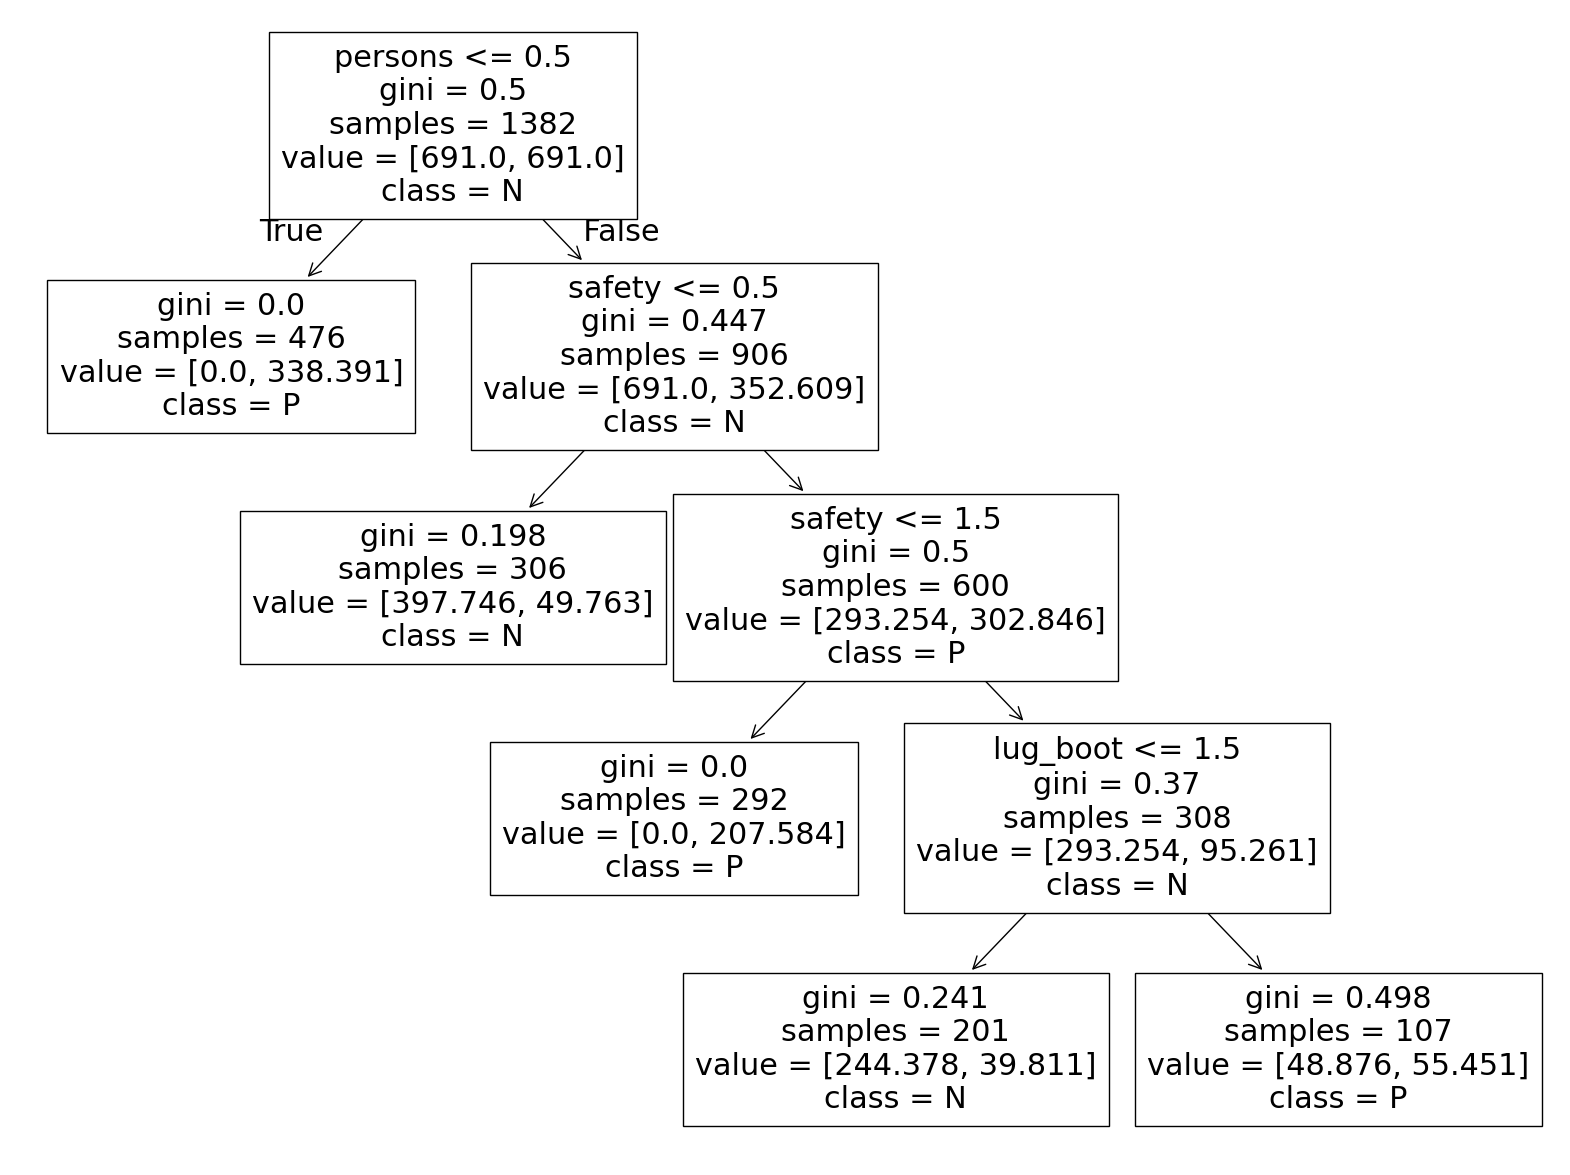

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P'])

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']
car_test_prepared = pipe.transform(car_test)
car_test_labels_prepared = label_enc.transform(car_test_labels)
print(f"Accuracy: {accuracy_score(car_test_labels_prepared, tree_best.predict(car_test_prepared))}")
print(f"Confusion Matrix: {confusion_matrix(car_test_labels_prepared, tree_best.predict(car_test_prepared))}")
print(f"Classification Report: {classification_report(car_test_labels_prepared, tree_best.predict(car_test_prepared))}")

Accuracy: 0.8930635838150289
Confusion Matrix: [[102   6]
 [ 31 207]]
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.94      0.85       108
           1       0.97      0.87      0.92       238

    accuracy                           0.89       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.91      0.89      0.90       346

